# fb testing

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import pickle
import dask as pd
import pandas as pd_old
import warnings
import utils
import heartpy as hp
from ECG_feature_extractor_1001 import *
# import time 
import time
from datetime import datetime
from biosppy.signals import ecg
from feature_extraction import SubjectData, compute_features, get_samples, combine_files

# To ignore all warnings:
warnings.filterwarnings("ignore", module="numpy")

In [ ]:
WINDOW_IN_SECONDS = 60
stride = 1
label_dict = {'baseline': 1, 'stress': 2, 'amusement': 0}
int_to_label = {1: 'baseline', 2: 'stress', 0: 'amusement'}
feat_names = None
loadPath = '../data/WESAD'
savePath = '../data/GN-WESAD'
subject_feature_path = '/subject_feats'
onedrive = (
    '/mnt/d/Users/alkurdi/OneDrive - University of Illinois - Urbana/data/GN-WESAD'
)
n_samples = 10
subject_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]
snrs = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6]  # 0.00001,
fb_model_list = ['DT', 'RF', 'LDA', 'KNN', 'AdaBoost', 'SVM']

if not os.path.exists(savePath):
    os.makedirs(savePath)
if not os.path.exists(savePath + subject_feature_path):
    os.makedirs(savePath + subject_feature_path)

In [22]:
def get_processing_status(snrs, subject_ids, onedrive, n_samples=10):
    # bads are the ones that do not have the gaussian-modified data.
    bads = []
    bad_snrs = []
    bad_subjects = []
    bad_ns = []
    completed_snrs = []
    for n_i in range(n_samples):
        for snr in snrs:
            for subject_id in subject_ids:
                # print(snr)

                # print(f'{onedrive}/n_{n_i}/snr_{snr}/S{subject_id}/{a}')
                try:
                    a = os.listdir(f'{onedrive}/n_{n_i}/snr_{str(snr)}/S{subject_id}')
                    a[0]
                    completed_snrs.append(snr)
                except:
                    bads.append(f'n_{n_i}/snr_{snr}/S{subject_id}')
                    bad_snrs.append(snr)
                    bad_subjects.append(subject_id)
                    bad_ns.append(n_i)

    bad_snrs = sorted(set(bad_snrs))
    bad_subjects = sorted(set(bad_subjects))
    bad_ns = sorted(set(bad_ns))
    completed_snrs = sorted(set(completed_snrs))
    # printing after checking
    print(f'completed snrs :{completed_snrs}')
    print(f'incomplete snrs :{bad_snrs}')


get_processing_status(snrs, subject_ids, onedrive, n_samples=n_samples)

NameError: name 'snrs' is not defined

In [ ]:
dataset_list = []
for i in os.listdir(f'{loadPath}/subject_feats'):
    # print (i)
    if 'S' not in i[0]:
        dataset_list.append(i)

In [ ]:
model_results = {}

for each_dataset in dataset_list:
    for snr in snrs:
        for model in fb_model_list:
            pass

In [ ]:
import os

savePath = 'C:/Users/alkurdi/Downloads/WESAD/GN-WESAD'
n_samples = [9]
subject_ids = [2]
snrs = [0.01]
for n_i in n_samples:
    if not os.path.exists(savePath + '/n_' + str(n_i)):
        os.makedirs(savePath + '/n_' + str(n_i))
    for snr in snrs:
        if not os.path.exists(savePath + '/n_' + str(n_i) + '/snr_' + str(snr)):
            os.makedirs(savePath + '/n_' + str(n_i) + '/snr_' + str(snr))
        for subject_id in subject_ids:
            if not os.path.exists(
                savePath
                + '/n_'
                + str(n_i)
                + '/snr_'
                + str(snr)
                + '/S'
                + str(subject_id)
            ):
                os.makedirs(
                    savePath
                    + '/n_'
                    + str(n_i)
                    + '/snr_'
                    + str(snr)
                    + '/S'
                    + str(subject_id)
                )

In [ ]:
print(f'{savePath}/n_{n_i}')
print(os.path.isdir(f'{savePath}/n_{n_i}'))
print(os.listdir(f'{savePath}/n_{n_i}'))
print(
    os.path.isdir(
        f'{savePath}/n_{n_i}/snr_{snr}/fixed_resampled140hz_S{subject_id}.pkl'
    )
)

with open(f'{savePath}/n_{n_i}/poop.txt', 'w') as f:
    f.write('poop')

In [ ]:
results_table = pd_old.DataFrame(columns=['SNR', 'Accuracy', 'F1-Score', 'dataset'])
results_table.loc[str('SVM')] = pd_old.Series(
    {'SNR': 1, 'Accuracy': 5, 'F1 Score': 2, 'dataset': 'WESAD'}
)
results_table.loc[str('RF')] = pd_old.Series(
    {'SNR': 1, 'Accuracy': 5, 'F1 Score': 2, 'dataset': 'WESAD'}
)
'''
fb_model_list = ['SVM', 'RF']
for model in fb_model_list:
    for i in range(len(snrs)):
        results_table.loc[str(model) + str(snrs[i])] = pd.Series({'SNR':snrs[i], 'Accuracy':svm_accuracy[i], 'F1 Score':2, 'dataset':'WESAD'})
'''
display(results_table)

In [ ]:
start = time.time()

ecg_biosppy = ecg
ecg = None
fs_ecg = 700
fs_ppg = 64
subject_id = 2

In [ ]:
subject = SubjectData(main_path=loadPath, subject_number=subject_id)
data_dict = subject.get_wrist_and_chest_data()

In [ ]:
ecg = data_dict['ECG'][40000:60000].flatten()
ppg = data_dict['BVP'][int(40000 / 700 * 64) : int(60000 / 700 * 64)].flatten()
print('ecg len', len(ecg))
print('ppg len', len(ppg))


# testing for ECG

now = time.time()
# wd4, m4 = hp.process(ecg, fs_ecg)
# print('hp.process execution time is %5.2fs' % (time.time()-now))

now = time.time()
# pack2, ecgout2, time_dict2 = freq_ratio_hybrid(ecg, fs_ecg, RR1, method='welch', factor = 1)
# print('freq_ratio_hybrid execution time is %5.2fs' % (time.time()-now))

In [ ]:
now = time.time()
BS_signal_analysis3, pack3, ecg_out3 = analyze_ecg(ecg, fs_ecg)
print('analyze_ecg execution time is ', now - time.time())

In [ ]:
ecg = data_dict['ECG'][10000:80000].flatten()

In [ ]:
# testing for PPG

now = datetime.now()
pack, ppg, RR, time_dict = freq_ratio(ppg, fs_ppg, method='welch', factor=1)
print('freq_ratio execution time is ', now - time.time())

now = datetime.now()
pack, ppg, time_dict = freq_ratio_hybrid(ppg, fs_ppg, method='welch', factor=1)
print('freq_ratio_hybrid execution time is ', now - time.time())

now = datetime.now()
BS_signal_analysis, pack, ppg_out = analyze_ecg(ppg, fs_ppg)
print('analyze_ecg execution time is ', now - time.time())

now = datetime.now()
wd, m = hp.process(ppg, fs_ppg)
print('hp.process execution time is ', now - time.time())

now = datetime.now()
pack, ppg, RR = freq_ratio_fast(ppg, fs_ppg, method='welch', factor=1)
print('freq_ratio_fast execution time is ', now - time.time())

In [ ]:
subject_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]
import logging


def combine_noiZ_files(subject_ids):
    today = datetime.now().strftime('%Y-%m-%d')
    logging.basicConfig(
        level=logging.DEBUG, filename=today + '-combine.log', filemode='w', force=True
    )
    logging.info('Started')
    print('total number of combines: ', len(snrs) * n_samples)
    df_list = []
    i = 0
    for snr in snrs:
        for n_i in range(n_samples):
            for s in subject_ids:
                df = pd_old.read_csv(
                    f'{savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/S{s}_feats.csv',
                    index_col=0,
                )
                df['subject'] = s
                df_list.append(df)
            df = pd_old.concat(df_list)
            df['label'] = (
                df['0'].astype(str) + df['1'].astype(str) + df['2'].astype(str)
            ).apply(lambda x: x.index('1'))
            df.drop(['0', '1', '2'], axis=1, inplace=True)
            df.reset_index(drop=True, inplace=True)
            now = datetime.now().strftime('%Y-%m-%d')
            df.to_csv(
                f'{savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/{now}_feats_filt.csv'
            )
            i += 1
            logging.info(
                f'Saved file to: {savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/{today}_feats_filt.csv  {i}/{len(snrs)*n_samples}'
            )
            print(
                'Saved file to: ',
                f'.../n_{n_i}/snr_{snr}{subject_feature_path}/{now}_feats_filt.csv   {i}/{len(snrs)*n_samples}',
            )
            counts = df['label'].value_counts()
            logging.info('Number of samples per class:')
            logging.info(
                'baseline: {0[1]}; stress: {1[1]}; amusement: {2[1]} '.format(
                    *list(zip(counts.index, counts.values))
                )
            )
    logging.info('all done!')

In [ ]:
combine_noiZ_files(subject_ids)
# took 19m 30s to run

In [ ]:
import pandas as pd
import os
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor
import logging

now = datetime.now().strftime('%Y-%m-%d')


def process_subject_file(snr, n_i, s):
    file_path = f'{savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/S{s}_feats.csv'
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, index_col=0)
        df['subject'] = s
        return df
    return None


def combine_noiZ_files(subjects):
    now = datetime.now().strftime('%Y-%m-%d')
    logging.basicConfig(
        level=logging.INFO, filename=now + '-combine.log', filemode='w', force=True
    )

    for snr in snrs:
        for n_i in range(n_samples):
            # Parallelize file reading
            with ThreadPoolExecutor(max_workers=10) as executor:
                futures = [
                    executor.submit(process_subject_file, snr, n_i, s) for s in subjects
                ]
                df_list = [
                    future.result() for future in futures if future.result() is not None
                ]

            if df_list:
                df = pd.concat(df_list)
                df['label'] = df[['0', '1', '2']].idxmax(axis=1)
                df.drop(['0', '1', '2'], axis=1, inplace=True)
                df.reset_index(drop=True, inplace=True)

                df.to_csv(
                    f'{savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/{now}_feats_filt.csv'
                )
                logging.info('-' * 20)
                logging.info(
                    f'Saved file to: {savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/{now}_feats_filt.csv'
                )

                counts = df['label'].value_counts()
                logging.info('Number of samples per class:')
                logging.info(
                    'baseline: {0[1]}; stress: {1[1]}; amusement: {2[1]} '.format(
                        *list(zip(counts.index, counts.values))
                    )
                )
    logging.info('all done!')

In [ ]:
n_i = 5
s = 2
snr = 0.6
df = pd_old.read_csv(
    f'{savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/S{subject_id}_feats.csv',
    index_col=0,
)
df['subject'] = s
# df_list.append(df)
# f = pd_old.concat(df_list)
df['label'] = (df['0'].astype(str) + df['1'].astype(str) + df['2'].astype(str)).apply(
    lambda x: x.index('1')
)
df.drop(['0', '1', '2'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

counts = df['label'].value_counts()
print('Number of samples per class:')
print(
    'baseline: {0[1]}; stress: {1[1]}; amusement: {2[1]} '.format(
        *list(zip(counts.index, counts.values))
    )
)

In [ ]:
combine_noiZ_files(subject_ids)
# this paralellized took 34seconds

In [ ]:
logging.basicConfig(level=logging.INFO, filemode='w', force=True)
logging.info('GN-WESAD models ran and results generated and saved in: ')

In [ ]:
def read_n_reduce(path):
    # print(os.listdir(path))
    df = pd_old.read_csv(path, index_col=0)
    print('len of df ', len(df))
    pd_old.set_option('display.max_columns', None)
    # We want to drop columns in df that are not in RADWear to match modalities.
    # drop _c columns
    columns_list = df.columns.tolist()
    drop_list = []
    # df.drop(columns=['Resp_C'])
    for column in columns_list:
        if (
            'EMG' in column
            or 'EDA_C' in column
            or 'Temp_C' in column
            or 'TEMP_C' in column
            or 'SCR_C' in column
            or 'SCL_C' in column
        ):
            drop_list.append(column)

    reduced_df = df.drop(columns=drop_list)
    df = reduced_df
    print('len of reduced df ', len(df))
    return df


def gn_wesad_path(n_i, snr):
    loadPath = '../data/GN-WESAD'
    return (
        f'{loadPath}/n_{n_i}/snr_{snr}{subject_feature_path}/{gn_wesad_day}_feats2.csv'
    )


gn_wesad_day = '2023-11-13'
matrix = np.zeros((len(snrs), n_samples))

for n_i in range(n_samples):
    for i, snr in enumerate(snrs):
        print(f'for {n_i} and {snr} number {i}: ')
        file_path = gn_wesad_path(n_i, snr)
        df = read_n_reduce(file_path)
        matrix[i][n_i] = len(df)

In [ ]:
'data/GN-WESAD/n_0/snr_0.0001/subject_feats/2023-11-12_feats_filt.csv'
'data/GN-WESAD/n_0/snr_0.001/subject_feats/2023-11-12_feats_filt.csv'
loadPath = '../data/GN-WESAD'
# display(os.listdir(f'{loadPath}/n_{n_i}/snr_{snr}{subject_feature_path}'))
snr0001 = pd_old.read_csv(
    '../data/GN-WESAD/n_0/snr_0.0001/subject_feats/2023-11-13_feats2.csv', index_col=0
)
snr001 = pd_old.read_csv(
    '../data/GN-WESAD/n_0/snr_0.001/subject_feats/2023-11-13_feats2.csv', index_col=0
)

In [ ]:
import pandas as pd

df = pd.DataFrame(
    {
        'SNR': [0.6] * 10,
        'Accuracy': [
            0.940639,
            0.968134,
            0.964939,
            0.940909,
            0.937785,
            0.923780,
            0.942337,
            0.960486,
            0.952816,
            0.925645,
        ],
        'F1 Score': [
            0.940639,
            0.968134,
            0.964939,
            0.940909,
            0.937785,
            0.923780,
            0.942337,
            0.960486,
            0.952816,
            0.925645,
        ],
        'dataset': ['GN-WESAD'] * 10,
        'n_i': list(range(10)),
        'n': [10] * 10,
        'noise gen function': ['Gaussian Noise'] * 10,
        'Precision': [
            0.940639,
            0.968134,
            0.964939,
            0.940909,
            0.937785,
            0.923780,
            0.942337,
            0.960486,
            0.952816,
            0.925645,
        ],
        'Recall': [
            0.940639,
            0.968134,
            0.964939,
            0.940909,
            0.937785,
            0.923780,
            0.942337,
            0.960486,
            0.952816,
            0.925645,
        ],
        'Model': ['DT'] * 10,
    }
)

# Example Series
series = pd.Series(
    {
        'SNR': 0.600000,
        'Accuracy': 0.945747,
        'F1 Score': 0.945747,
        'n_i': 4.500000,
        'n': 10.000000,
        'Precision': 0.945747,
        'Recall': 0.945747,
    },
    name='SNR 0.6 Model DT mean',
)

# Convert the series to a DataFrame
series_df = series.to_frame().T

# Append the new DataFrame to the existing one
df_combined = pd.concat([df, series_df], ignore_index=True)

display(df_combined)

In [ ]:
df = pd.DataFrame(
    {
        'SNR': [0.6] * 10,
        'Accuracy': [
            0.940639,
            0.968134,
            0.964939,
            0.940909,
            0.937785,
            0.923780,
            0.942337,
            0.960486,
            0.952816,
            0.925645,
        ],
        'F1 Score': [
            0.940639,
            0.968134,
            0.964939,
            0.940909,
            0.937785,
            0.923780,
            0.942337,
            0.960486,
            0.952816,
            0.925645,
        ],
        'dataset': ['GN-WESAD'] * 10,
        'n_i': list(range(10)),
        'n': [10] * 10,
        'noise gen function': ['Gaussian Noise'] * 10,
        'Precision': [
            0.940639,
            0.968134,
            0.964939,
            0.940909,
            0.937785,
            0.923780,
            0.942337,
            0.960486,
            0.952816,
            0.925645,
        ],
        'Recall': [
            0.940639,
            0.968134,
            0.964939,
            0.940909,
            0.937785,
            0.923780,
            0.942337,
            0.960486,
            0.952816,
            0.925645,
        ],
        'Model': ['DT'] * 10,
    }
)
series = pd.Series(
    {
        'SNR': 0.600000,
        'Accuracy': 0.945747,
        'F1 Score': 0.945747,
        'n_i': 4.500000,
        'n': 10.000000,
        'Precision': 0.945747,
        'Recall': 0.945747,
    },
    name='SNR 0.6 Model DT mean',
)

print(set(df.columns))
print(set(series.index))
missing_columns = set(df.columns) - set(series.index)
print(missing_columns)
for col in missing_columns:
    # You can assign a specific value or use a value from the DataFrame
    # Here, I'm using the first row's value as an example
    # print(col)
    # print(df[col].iloc[0])

    series[col] = df[col].iloc[0]
    # print(series[col])

# print(series)

series_df2 = series.to_frame().T
display(series_df2)
df_combined2 = pd.concat([df, series_df2])
display(df_combined2)

In [ ]:
# tabulate and plot

with open('../data/GN-WESAD/cm_cr_dict.pickle', 'rb') as handle:
    GN_cm_cr_dict = pickle.load(handle)
with open('../data/WESAD/cm_cr_dict.pickle', 'rb') as handle:
    WESAD_cm_cr_dict = pickle.load(handle)
wesad_acc = pd.read_csv(
    '../data/WESAD/wesad_models_results-win60stride1_wcm_wcr.csv', index_col=0
)
display(wesad_acc)
# combined_results = pd.concat([WESAD_model_results, GN_model_results])

In [ ]:
fb_model_list

In [ ]:
with open('../data/GN-WESAD/cm_cr_dict.pickle', 'rb') as handle:
    GN_cm_cr_dict = pickle.load(handle)
tgt_file = '../data/GN-WESAD/GN_wesad_models_results_wbinaryf1.csv'
gn_wesad_acc = pd.read_csv(tgt_file, index_col=0)
# gn_wesad_acc['Binary F1'] = None
print(gn_wesad_acc.shape)

In [ ]:
gn_wesad_acc

In [ ]:
with open('../data/GN-WESAD/cm_cr_dict.pickle', 'rb') as handle:
    GN_cm_cr_dict = pickle.load(handle)
tgt_file = '../data/GN-WESAD/GN_wesad_models_results_wcm_wcr.csv'
gn_wesad_acc = pd.read_csv(tgt_file, index_col=0)
gn_wesad_acc['Binary F1'] = None

for i, classification_report in enumerate(GN_cm_cr_dict['cr']):
    cr = classification_report['Classification Report']
    print(classification_report['id'][2], fb_model_list[i % 6])
    # print(cr)
    # print(i//5)
    binary_f1_score = calculate_binary_metrics(cr)
    # print(classification_report['id'])
    if binary_f1_score is not None:
        # print("Binary F1 Score for ", fb_model_list[i], " :\t\t", binary_f1_score)
        insta_acc = wesad_acc['Accuracy'][i % 6]
        insta_f1 = wesad_acc['F1 Score'][i % 6]
        secret_df = pd.concat(
            [
                secret_df,
                pd.Series(
                    {
                        'Model': fb_model_list[i % 6],
                        'Binary F1 Score': binary_f1_score,
                        'SNR': classification_report['id'][0],
                        'n': classification_report['id'][1],
                        'Model': classification_report['id'][2],
                    }
                )
                .to_frame()
                .T,
            ],
            ignore_index=True,
        )
        # print(f'my calc acc {insta_acc}, calc f1 {insta_f1}')
        # display(wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]])#['binary f1'] = binary_f1_score
        # wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]]['binary f1'] = binary_f1_score
        # wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]]['binary acc'] = insta_acc
        # print(fb_model_list[i])
        gn_wesad_acc.loc[
            gn_wesad_acc['Model'] == fb_model_list[i % 6], 'Binary f1'
        ] = binary_f1_score
        # print(gn_wesad_acc.loc[gn_wesad_acc['Model'] == fb_model_list[i], 'binary f1'])

    else:
        print("Could not extract metrics from the report.")

In [ ]:
print(len(GN_cm_cr_dict['cr']))
print(len(WESAD_cm_cr_dict['cr']))

In [ ]:
wesad_acc_test = wesad_acc.copy()
display(wesad_acc_test)
# wesad_acc_test.loc['Model'] = 'DT'
model = 'DT'
# display (wesad_acc_test[wesad_acc_test['Model'] == model]['binary f1'] = 4)#[wesad_acc_test['SNR'] == np.nan] )

In [ ]:
for row in wesad_acc_test.iterrows():
    # if row[1]['Model'] == model:
    #    row[1]['binary f1'] = 4
    print(row)
    break

In [ ]:
wesad_acc_test['binary f1'] = None
wesad_acc_test['binary acc'] = None
# display(wesad_acc_test.drop(columns=[['binary f1', 'wow']]))
display(wesad_acc_test)

In [ ]:
for result in WESAD_cm_cr_dict['cr']:
    # print('result', result)
    if True:  #'.' in result['id']:
        # print(result['id'])
        print(result['Classification Report'])
        # print('------------------')

In [ ]:
import re

wesad_acc_test = wesad_acc.copy()
wesad_acc_test['Binary F1'] = None


def extract_metrics(report):
    # Regular expression to find numeric values
    regex = r"\s+1\s+([\d\.]+)\s+([\d\.]+)\s+([\d\.]+)"

    # Search for the pattern
    match = re.search(regex, report)
    # print(match)
    if match:
        precision = float(match.group(1))
        recall = float(match.group(2))
        f1_score = float(match.group(3))
        return precision, recall, f1_score
    else:
        return None, None, None


def calculate_binary_metrics(report):
    precision, recall, f1_score = extract_metrics(report)

    if precision is not None and recall is not None:
        # Calculate binary F1 score for class 1
        binary_f1_score = 2 * (precision * recall) / (precision + recall)
        return binary_f1_score
    else:
        return None


# classification_report =
# Extract and calculate binary F1 score
fb_model_counter = fb_model_list


secret_df = pd.DataFrame()

for i, classification_report in enumerate(WESAD_cm_cr_dict['cr']):
    cr = classification_report['Classification Report']
    binary_f1_score = calculate_binary_metrics(cr)
    # print(classification_report['id'])
    if binary_f1_score is not None:
        print("Binary F1 Score for ", fb_model_list[i], " :\t\t", binary_f1_score)
        insta_acc = wesad_acc['Accuracy'][i]
        insta_f1 = wesad_acc['F1 Score'][i]
        secret_df = pd.concat(
            [
                secret_df,
                pd.Series(
                    {
                        'Model': fb_model_list[i],
                        'Binary F1 Score': binary_f1_score,
                        'SNR': classification_report['id'][0],
                        'n': classification_report['id'][1],
                        'Model': classification_report['id'][2],
                    }
                )
                .to_frame()
                .T,
            ],
            ignore_index=True,
        )
        # print(f'my calc acc {insta_acc}, calc f1 {insta_f1}')
        # display(wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]])#['binary f1'] = binary_f1_score
        # wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]]['binary f1'] = binary_f1_score
        # wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]]['binary acc'] = insta_acc
        # print(fb_model_list[i])
        wesad_acc_test.loc[
            wesad_acc_test['Model'] == fb_model_list[i], 'binary f1'
        ] = binary_f1_score
        print(
            wesad_acc_test.loc[wesad_acc_test['Model'] == fb_model_list[i], 'binary f1']
        )

    else:
        print("Could not extract metrics from the report.")
display(secret_df)
display(wesad_acc_test)

In [ ]:
pd.concat([wesad_acc, secret_df], ignore_index=True)

In [ ]:
fafi = pd.DataFrame(
    columns=[
        'SNR',
        'Accuracy',
        'F1 Score',
        'dataset',
        'n_i',
        'n',
        'noise gen function',
        'Precision',
        'Recall',
        'Model',
    ]
)
pd.Series(classification_report['id']).to_frame().T
wow = (
    pd.Series(classification_report['id'])
    .to_frame()
    .T.rename(columns={0: 'SNR', 1: 'n', 2: 'model'})
)
fafi = pd.concat([fafi, wow])
display(fafi)

In [ ]:
classification_report['id'][2]

In [ ]:
len(WESAD_cm_cr_dict['cr'])
fb_model_list

In [ ]:
wesad_acc['Accuracy'][i]
wesad_acc['F1 Score'][i]

In [ ]:
def read_n_reduce(path):
    df = pd.read_csv(path, index_col=0)
    pd.set_option('display.max_columns', None)
    # We want to drop columns in df that are not in RADWear to match modalities.
    # drop _c columns
    columns_list = df.columns.tolist()
    drop_list = []
    # df.drop(columns=['Resp_C'])
    for column in columns_list:
        if (
            'EMG' in column
            or 'EDA_C' in column
            or 'Temp_C' in column
            or 'TEMP_C' in column
            or 'SCR_C' in column
            or 'SCL_C' in column
        ):
            drop_list.append(column)

    reduced_df = df.drop(columns=drop_list)
    df = reduced_df
    return df


print(os.listdir('../data/WESAD'))
df = read_n_reduce('../data/WESAD//subject_feats/oct5_feats4.csv')

In [ ]:
reduced = df.drop(['label', 'subject'], axis=1)

In [ ]:
reduced.shape

In [ ]:
from sklearn.model_selection import train_test_split


def split_data(df, test_size=0.2, random_state=0):
    # split data into features and labels
    X = df.drop('label', axis=1).values
    y = df['label'].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return [X_train, X_test, y_train, y_test]


the_splits = split_data(df)

In [ ]:
np.shape(X_train)

In [ ]:
df.drop(columns=['label'])

In [ ]:
df

xx = df.drop(columns=['label'])
yy = df['label']
# xx.drop('label', axis=1, inplace=True)

In [ ]:
display(xx)
display(yy)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# display(the_splits[0])
X_train, X_test, y_train, y_test = the_splits
clf = SVC(kernel='linear', C=1, random_state=0)
clf.fit(X_train, y_train)
y_out = clf.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_out)

In [ ]:
print(X_train, X_test, y_train, y_test)

In [ ]:
old_wesad = pd.read_csv('../data/WESAD/subject_feats/oct5_feats4.csv', index_col=0)
new_wesad = pd.read_csv(
    '../data/WESAD/subject_feats/WESADfeatures-win60stride1.csv', index_col=0
)

In [ ]:
gn_wesad = pd.read_csv(
    '../data/GN-WESAD/n_0/snr_0.0001/subject_feats/2023-11-13_feats2.csv', index_col=0
)

In [ ]:
for snr in snrs:
    for n_i in range(n_samples):
        tgt = f'../data/GN-WESAD/n_{n_i}/snr_{snr}{subject_feature_path}/{gn_wesad_day}_feats2.csv'
        print(f'df {snr} n {n_i} shape is {(pd.read_csv(tgt, index_col=0)).shape}')

In [ ]:
print('features used for fb_models\n', *old_wesad.columns, sep=',\n')

In [ ]:
print('features used for fb_models\n', *new_wesad.columns, sep='\n')

In [ ]:
import pandas as pd
import pickle
import os
from time import time

subject_id = 2
snr = 0.01
n_i = 0


wesad_path = '/mnt/d/Users/alkurdi/data/WESAD'
freshwesad_path = '/mnt/d/Users/alkurdi/data/freshWESAD'
downloaddwesad_path = '/mnt/c/Users/alkurdi/Desktop/Vansh/data'
gn_path = '/mnt/d/Users/alkurdi/data/GN-WESAD'

sesh_path = '/n_' + str(n_i) + '/snr_' + str(snr) + '/S' + str(subject_id)
load_gn_path = gn_path + sesh_path + '/S' + str(subject_id) + '.pkl'
load_dw_path = (
    downloaddwesad_path + '/S' + str(subject_id) + '/S' + str(subject_id) + '.pkl'
)
load_ws_path = wesad_path + '/S' + str(subject_id) + '/S' + str(subject_id) + '.pkl'
load_freshws_path = (
    freshwesad_path + '/S' + str(subject_id) + '/S' + str(subject_id) + '.pkl'
)

# ws_df = pd.read_pickle(load_ws_path)

# with open( load_ws_path, 'rb') as dest:
#    ws_df = pickle.load(dest)

now = time()
with open(load_dw_path, 'rb') as file:
    dw_df = pickle.load(file, encoding='latin1')
print(
    'c:\ downloads wesad loaded w pickle.load in ', round(time() - now, 3), 's'
)  # c:\ downloads wesad loaded w pickle.load in  17.112 s


now = time()
with open(load_gn_path, 'rb') as file:
    gn_df = pickle.load(file, encoding='latin1')
print('gnwesad loaded in ', round(time() - now, 3), 's')

'''
now = time()
with open(load_freshws_path, 'rb') as file:
            freshws_df = pickle.load(file, encoding='latin1')
print('d:\ freshwesad loaded in ', round(time()-now,3),'s')  #d:\ freshwesad loaded in  191.335 s

now = time()
dw_df = pd.read_pickle(load_dw_path)
print('c:\ downloads wesad loaded w pd.read_pickle in ', round(time()-now,3),'s') #c:\ downloads wesad loaded w pd.read_pickle in  24.78 s


#this is the one that fails
load_ws_path = wesad_path + '/S'+str(subject_id) + '/S'+str(subject_id)+'.pkl'
now = time()
with open(load_ws_path, 'rb') as file:
            ws_df = pickle.load(file, encoding='latin1')
print('wesad loaded in ', round(time()-now,3),'s')
'''
# fresh_df = pd.read_pickle()
# wesad_path = '/mnt/c/Users/alkurdi/Desktop/Vansh/data/WESAD'
# msg = f'starting  n_i: {n_i}; snr: {snr}, id: {subject_id}. iteration'
# sesh_path = '/n_'+str(n_i)+'/snr_'+str(snr)+'/S'+str(subject_id)
pass

In [ ]:
now = time()
with open(
    '/mnt/c/Users/alkurdi/Downloads/WESAD/GN-WESAD/n_0/snr_0.6/S17/fixed_resampled140hz_S17.pkl',
    'rb',
) as file:
    resampled_gn = pickle.load(file, encoding='latin1')
print('resampled_gn loaded in ', round(time() - now, 3), 's')

In [ ]:
import sys
import numpy as np


def my_counter(df, name=None):
    i = 0
    long_list = []
    for i_first_layer in df.keys():
        # print(i_first_layer, dw_df[i_first_layer])
        if i_first_layer == 'label':
            long_list = long_list + [*df[i_first_layer]]
            i += len(df[i_first_layer])
            print(f'{name}: length of {i_first_layer} is {len(df[i_first_layer]):,.0f}')
        elif i_first_layer == 'signal':
            for i_second_layer in df[i_first_layer].keys():
                # print('part', i_second_layer)#, dw_df[i_first_layer][i_second_layer])

                for i_third_layer in df[i_first_layer][i_second_layer].keys():
                    sig_shape = np.shape(
                        df[i_first_layer][i_second_layer][i_third_layer]
                    )
                    # print('part', i_second_layer, 'signal', i_third_layer, sig_shape)
                    i += np.prod(sig_shape)
                    long_list = long_list + [
                        *df[i_first_layer][i_second_layer][i_third_layer].flatten()
                    ]
                    print(
                        f'{name}: length of {i_third_layer} is {len(df[i_first_layer][i_second_layer][i_third_layer]):,.0f}'
                    )
        elif i_first_layer == 'subject':
            pass
        else:
            long_list = long_list + [*df[i_first_layer].flatten()]
            i += np.prod(np.shape(df[i_first_layer]))
            print(f'{name}: length of {i_first_layer} is {len(df[i_first_layer]):,.0f}')
    print('_' * 5)
    print(f'total length of {name} df is {len(long_list):,.0f}')
    print('_' * 25)


my_counter(dw_df, name='dw_df')
my_counter(gn_df, name='gs_df')
my_counter(resampled_gn, name='resampled_gn')

In [ ]:
import sys

print(os.getpid(), file=sys.stderr)
import concurrent.futures
from concurrent.futures import ProcessPoolExecutor
import requests

from subprocess import PIPE, Popen


def get_cmd(pid):
    with Popen(f"ps -q {pid} -o comm=", shell=True, stdout=PIPE) as p:
        return p.communicate()[0]


get_cmd(os.getpid())

In [ ]:
long_list = list(dw_df['signal']['chest'].items()) + list(
    dw_df['signal']['wrist'].items()
)
a, b = zip(*long_list)
tot_len = 0
for i in list(b):
    tot_len += len(i)
print(f'total length wesad {tot_len:,.0f}')

In [ ]:
path = '/mnt/c/Users/alkurdi/Downloads/WESAD/GN-WESAD/n_0/snr_0.0001/S2'
os.listdir(path)

In [ ]:
a, b = 0, 0
a, b = zip(*list(gn_df.items()))
tot_len = 0
for i in list(b):
    tot_len += len(i)
print(f'total length gn wesad {tot_len:,.0f}')

In [ ]:
import pandas as pd

pd.__version__

In [ ]:
# wesad_path = '/mnt/c/Users/alkurdi/data/WESAD'
fresh_wesad_path = '/mnt/c/Users/alkurdi/Downloads/WESAD/WESAD'

# start_time = time()
id = 2
sesh_path = fresh_wesad_path + '/S' + str(id) + '/S' + str(id) + '.pkl'

ws_df = pd.read_pickle(sesh_path)
# with open( sesh_path, 'rb') as dest:
#        ws2_df = pickle.load(dest)

In [ ]:
fixed_resampled_df = pd.read_pickle(
    '/mnt/d/Users/alkurdi/data/GN-WESAD/n_0/snr_0.01/S17/fixed_resampled170hz64_S17.pkl'
)

In [ ]:
print('for resampled dataset: ')
for key in fixed_resampled_df.keys():
    print(
        f'length of signal {key}: ', len(fixed_resampled_df['signal']['chest']['ECG'])
    )

In [ ]:
print('keys', ws_df.keys())
print('keys', ws_df['signal'].keys())
print('length of signal', len(ws_df['signal']['chest']['ECG']))

In [ ]:
len(fixed_resampled_df['signal']['chest']['ECG']) / len(ws_df['signal']['chest']['ECG'])

In [4]:
import os
from scipy import signal
from time import time
import concurrent.futures
import itertools
import pandas as pd
import logging
import pickle

In [ ]:


subject_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]
snrs = [ 0.01,0.1,0.6 0.05,  0.3,0.1, 0.15, 0.2,0.0001, 0.001, 0.4, 0.5, 0.6] # this is what we ran #0.00001,
n_samples = 0 #10
n_i = n_samples
snr1 = 0.01
snr2 = 0.6
subject_id = 17

sesh_id =[n_i,snr1,subject_id]
rt_pth = '/mnt/d/Users/alkurdi/data/GN-WESAD'
start_time = time()
onedrive = '/mnt/d/Users/alkurdi/OneDrive - University of Illinois - Urbana/data/GN-WESAD'

#print(os.path.isfile(rt_pth + '/n_'+str(0)+'/snr_'+str(snr1)+ '/S'+str(17)+'/S'+str(17)+'.pkl'))
sesh_path = rt_pth + '/n_'+str(0)+'/snr_'+str(0.0001)+ '/S'+str(2)+'/S'+str(2)+'.pkl'
#drive_path = onedrive +  '/n_'+str(0)+'/snr_'+str(snr1)+ '/S'+str(subject_id)+'/S'+str(subject_id)+'.pkl'
with open( sesh_path, 'rb') as dest:
        ws1_df = pickle.load(dest) 



In [ ]:
rt_pth = '/mnt/d/Users/alkurdi/data/GN-WESAD'
# start_time = time()
id = 4
sesh_path = (
    rt_pth
    + '/n_'
    + str(1)
    + '/snr_'
    + str(0.001)
    + '/S'
    + str(id)
    + '/S'
    + str(id)
    + '.pkl'
)
# drive_path = onedrive +  '/n_'+str(0)+'/snr_'+str(snr1)+ '/S'+str(subject_id)+'/S'+str(subject_id)+'.pkl'

with open(sesh_path, 'rb') as dest:
    ws2_df = pickle.load(dest)

In [ ]:
print('for resampled dataset: ')
for key in ws2_df.keys():
    print('key', key)
    # print(f'length of chest ignal {key}: ', len(ws2_df['signal']['chest']['ECG']))
    # print(f'length of chest ignal {key}: ', len(ws2_df['signal']['chest']['ECG']))

In [ ]:
subject_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]
# snrs = [ 0.01,0.1,0.6 0.05,  0.3,0.1, 0.15, 0.2,0.0001, 0.001, 0.4, 0.5, 0.6] # this is what we ran #0.00001,
snrs = [0.01, 0.05, 0.3]  # ,0.1, 0.15, 0.2,0.0001, 0.001, 0.4, 0.5, 0.6]
n_i = [0, 1, 3, 4]  # next is [5, 6, 7] [8, 9, 10]


from_path = '/mnt/c/Users/alkurdi/Downloads/WESAD/GN-WESAD'
to_path = '/mnt/d/Users/alkurdi/data/GN-WESAD'


for n in n_i:
    for snr in snrs:
        for s in subject_ids:
            sesh_path = '/n_' + str(n_i) + '/snr_' + str(snr) + '/S' + str(subject_id)

            xact_from_path = from_path + sesh_path
            xact_to_path = to_path + sesh_path

            os.system(f'cp -r {from_path} {to_path}')
            print('done')

In [ ]:
# wait for 5 seconds
from time import sleep

from_path = '/mnt/c/Users/alkurdi/Downloads/WESAD'
poop = 'poop'

with open(from_path + '/poop.txt', 'w') as f:
    f.write(poop)

sleep(5)

# os.system(f'{from_path}/poop>poop.txt')

to_path = '/mnt/d/Users/alkurdi/data/'

os.system(f'mv {from_path}/poop.txt {to_path}/poop.txt')

# RADWear Calibration fix

In [97]:
'modified by abdul alkurdi; 10/05/2023'

import pandas as pd

# import cudf
import pickle, sys
import json
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import figure
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.signal import correlate

# import cupy as cp
from scipy.io import wavfile
from scipy import signal, stats

# import peakutils, wfdb, pywt
import csv
import os, statistics
from datetime import datetime

# import heartpy as hp
import json

# import neurokit2 as nk

# from syncfcns import *
calib_dict = {'meditation': 1, 'cpt': 2, 'baseline': 0}
rot_anx_dict = {'calibration': 0, 'LA': 1, 'HA': 2}

radwear_path = '/mnt/c/Users/alkurdi/Desktop/Vansh/data/RADWear/'

In [93]:
def read_sync_return(filepath, e4_today, hx_today):
    '''
    usage: read_sync_return(filepath, e4_today, hx_today)
    returns: synced_participant_data
    '''
    e4_dict = read_E4(filepath + '/' + e4_today, hx_today)
    hx_dict = read_hx(filepath + '/record_' + hx_today, hx_today)

    # e4sync_offset = E4sync_offset(e4_dict)
    # hxsync_offset = Hexsync_offset(hx_dict['ECG'],hx_dict['BR'],hx_dict['accx'],hx_dict['accy'], hx_dict['accz'])
    e4sync_offset = e4_dict
    hxsync_offset = hx_dict

    synced_participant_data = {}
    # cross syncing between devices but only on bvp and ecg
    synced_participant_data['ECG'], synced_participant_data['BVP'] = doublesync_offset(
        hxsync_offset['ECG'], e4sync_offset['BVP']
    )
    # for some reason we're losing seconds from beginning and end of hx data even though e4 is contained within it's timeframe.

    # running syncing on rest of signals for hx (ECG, breathing_rateacc, br)
    t0 = synced_participant_data['ECG']['Second'].iloc[0]  # hx
    tf = synced_participant_data['ECG']['Second'].iloc[-1]  # hx
    synced_participant_data['BR'] = (
        hxsync_offset['BR']
        .loc[hxsync_offset['BR']['Second'] >= t0]
        .loc[hxsync_offset['BR']['Second'] <= tf]
    )
    del tf, t0

    # running syncing on rest of signals for e4 (acc, eda, temp, hr, ibi )
    t0 = synced_participant_data['BVP']['Second'].iloc[0]  # e4
    tf = synced_participant_data['BVP']['Second'].iloc[-1]  # e4
    synced_participant_data['TEMP'] = (
        e4sync_offset['TEMP']
        .loc[e4sync_offset['TEMP']['Second'] >= t0]
        .loc[e4sync_offset['TEMP']['Second'] <= tf]
    )
    synced_participant_data['EDA'] = (
        e4sync_offset['EDA']
        .loc[e4sync_offset['EDA']['Second'] >= t0]
        .loc[e4sync_offset['EDA']['Second'] <= tf]
    )
    synced_participant_data['HR'] = (
        e4_dict['HR']
        .loc[e4_dict['HR']['Second'] >= t0]
        .loc[e4_dict['HR']['Second'] <= tf]
    )
    # synced_participant_data['IBI'] = e4sync_offset['IBI'].loc[e4sync_offset['IBI']['Second'] >= t0 ].loc[e4sync_offset['IBI']['Second'] <= tf ]
    del tf, t0

    hx_dict['ACC'] = hx_dict['accx']
    hx_dict['ACC']['Acc_Y'] = hx_dict['accy']['Acc_Y']
    hx_dict['ACC']['Acc_Z'] = hx_dict['accz']['Acc_Z']

    acc_dic = accsync_offset(e4sync_offset['ACC'], hxsync_offset['accx'])
    # offset_ecg_cross, offset_bvp_cross = doublesync_offset(e4sync_offset['ECG'], e4sync_offset['BVP'])
    synced_participant_data['ACC_hx'] = acc_dic['acc_hx']
    synced_participant_data['ACC_e4'] = acc_dic['acc_e4']

    return synced_participant_data

def read_hx(participant_day_filepath, date):
    '''
    takes in the participant filepath and the date of the data. it reads ecg, br, accx, accy, accz,    
    fhex = 'record_265679'
    '''
    # read raw ECG file; ECG_I.wav only
    # change wavefile pathway
    path = participant_day_filepath 

    raw_ECG = wavfile.read(path+'/ECG_I.wav')
    #settings = {}
    #settings['fs'] = 256 # sampling rate

    # ECG
    raw_ECG = pd.DataFrame(data = raw_ECG[1])
    ecg = 0.0064 * raw_ECG #get correct magnitude of ECG
    ecg.rename(columns = {0: 'ECG'}, inplace = True)
    # Opening JSON file and return it as dictionary
    # change file pathway
    f = open(path+'/info.json')
    date_info = json.load(f)

    # BR 
    raw_br = wavfile.read(path+'/breathing_rate.wav')
    raw_br = pd.DataFrame(data = raw_br[1])
    br = 1.0000 * raw_br
    br.rename(columns = {0: 'breathing_rate'}, inplace = True)

    # inspiration
    insp = pd.read_csv(path+'/inspiration.csv')
    insp['breathing_phase'] = 'insp'
    # expiration
    exp = pd.read_csv(path+'/expiration.csv')
    exp['breathing_phase'] = 'exp'
    # combine insp and exp
    b_ph = pd.concat([insp, exp])
    b_ph = b_ph.sort_values(by=['time [s]'])
    combined_b_ph = pd.concat([b_ph['inspiration [NA](/api/datatype/34/)'].dropna(),
                               b_ph['expiration [NA](/api/datatype/35/)'].dropna()]).sort_index()
    b_ph['ins | exp'] = combined_b_ph
    b_ph.drop(columns=['inspiration [NA](/api/datatype/34/)', 'expiration [NA](/api/datatype/35/)'], inplace=True)
    
    # respiration. took thoraccic because it's similar to the wesad resp location
    resp_thor = wavfile.read(path+'/respiration_thoracic.wav') 
    resp_thor = pd.DataFrame(data = resp_thor[1], columns = ['RESP'])
    
    # acc x
    raw_accX = wavfile.read(path+'/acceleration_X.wav')
    raw_accX = pd.DataFrame(data = raw_accX[1])
    accx = 1.0000 * raw_accX 
    accx.rename(columns = {0: 'Acc_X'}, inplace = True)
    # acc y
    raw_accY = wavfile.read(path+'/acceleration_Y.wav')
    raw_accY = pd.DataFrame(data = raw_accY[1])
    accy = 1.0000 * raw_accY 
    accy.rename(columns = {0: 'Acc_Y'}, inplace = True)
    # acc z
    raw_accZ = wavfile.read(path+'/acceleration_Z.wav')
    raw_accZ = pd.DataFrame(data = raw_accZ[1])
    accz = 1.0000 * raw_accZ 
    accz.rename(columns = {0: 'Acc_Z'}, inplace = True)


    # Add timestamp to Hex (ECG & ACC) signal
    t0_ecg = list(date_info.values())[0]/256
    ecg['Timestamp'] = list(range(0, len(raw_ECG),1))
    ecg['Timestamp'] = ecg['Timestamp'].apply(lambda x: x/256+t0_ecg)
    #ecg['Timestamp'] = ecg['Timestamp'].str.get(0)
    ecg['Second'] = ecg['Timestamp']
    ecg = ecg.set_index('Timestamp')
    ecg['Second'] = ecg['Second'].apply(lambda x: x-ecg.index[0])
    ecg = ecg.reset_index()
    #ecg.columns = ['Heart rate', 'Second']
    
    t0_br = list(date_info.values())[0]/256
    br['Timestamp'] = list(range(0, len(raw_br),1))
    br['Timestamp'] = br['Timestamp'].apply(lambda x: x/1+t0_br)
    br['Second'] = br['Timestamp']
    br = br.set_index('Timestamp')
    br['Second'] = br['Second'].apply(lambda x: x-br.index[0])
    br = br.reset_index()
    
    t0_b_hp = list(date_info.values())[0]/256
    b_ph['Timestamp'] = list(range(0, len(b_ph),1))
    b_ph['Timestamp'] = b_ph['Timestamp'].apply(lambda x: x/64+t0_b_hp)
    b_ph['Second'] = b_ph['Timestamp']
    b_ph = b_ph.set_index('Timestamp')
    b_ph['Second'] = b_ph['Second'].apply(lambda x: x-b_ph.index[0])
    b_ph = b_ph.reset_index()

    t0_resp = list(date_info.values())[0]/256
    resp_thor['Timestamp'] = list(range(0, len(resp_thor),1))
    resp_thor['Timestamp'] = resp_thor['Timestamp'].apply(lambda x: x/64+t0_resp)
    resp_thor['Second'] = resp_thor['Timestamp']
    resp_thor = resp_thor.set_index('Timestamp')
    resp_thor['Second'] = resp_thor['Second'].apply(lambda x: x-resp_thor.index[0])
    resp_thor = resp_thor.reset_index()

    t0_acc = list(date_info.values())[0]/256
    accx['Timestamp'] = list(range(0, len(raw_accX),1))
    accx['Timestamp'] = accx['Timestamp'].apply(lambda x: x/64+t0_acc)
    accx['Second'] = accx['Timestamp']
    accx = accx.set_index('Timestamp')
    accx['Second'] = accx['Second'].apply(lambda x: x-accx.index[0])
    accx = accx.reset_index()

    accy['Timestamp'] = list(range(0, len(raw_accY),1))
    accy['Timestamp'] = accy['Timestamp'].apply(lambda x: x/64+t0_acc)
    accy['Second'] = accy['Timestamp']
    accy = accy.set_index('Timestamp')
    accy['Second'] = accy['Second'].apply(lambda x: x-accy.index[0])
    accy = accy.reset_index()

    accz['Timestamp'] = list(range(0, len(raw_accZ),1))
    accz['Timestamp'] = accz['Timestamp'].apply(lambda x: x/64+t0_acc)
    accz['Second'] = accz['Timestamp']
    accz = accz.set_index('Timestamp')
    accz['Second'] = accz['Second'].apply(lambda x: x-accz.index[0])
    accz = accz.reset_index()
    
    data_dict = {'Date':date, 'ECG':ecg, 'BR':br, 'B_PH':b_ph,'RESP':resp_thor, 'accx':accx, 'accy':accy,'accz':accz}
    return data_dict

def read_E4(participant_filepath, date):
    '''
    usage:
        filepath=r'/home/maxinehe/Downloads/' + fE4
        a=read_E4(filepath, '230429')
        fE4 = 'A04BA8_230429-142458'
        fe4 = '230429-142458'
        
    '''
    filepath = participant_filepath
    # HR data -- started 10 seconds later than other metrics
    hr = pd.read_csv(filepath+str('/HR.csv'), header = None)
    # clean up HR file
    start_time = hr.values[0]
    hr_samp_rate = hr.values[1]
    hr = hr.drop(labels = [0, 1], axis = 0, inplace = False)
    hr['Timestamp'] = list(range(0, len(hr),1))
    hr['Timestamp'] = hr['Timestamp'].apply(lambda x: x/hr_samp_rate+start_time)
    hr['Timestamp'] = hr['Timestamp'].str.get(0)
    hr['Second'] = hr['Timestamp']
    hr = hr.set_index('Timestamp')
    hr['Second'] = hr['Second'].apply(lambda x: x-hr.index[0])
    hr.columns = ['Heart rate', 'Second']
    hr = hr.reset_index(inplace=False)
    
    # EDA data
    eda = pd.read_csv(filepath+str('/EDA.csv'), header = None)
    start_time = eda.values[0]
    eda_samp_rate = eda.values[1]
    eda = eda.drop(labels = [0, 1], axis = 0, inplace = False)
    eda['Timestamp'] = list(range(0, len(eda),1))
    eda['Timestamp'] = eda['Timestamp'].apply(lambda x: x/eda_samp_rate+start_time)
    eda['Timestamp'] = eda['Timestamp'].str.get(0)
    eda['Second'] = eda['Timestamp']
    eda = eda.set_index('Timestamp')
    eda['Second'] = eda['Second'].apply(lambda x: x-eda.index[0])
    eda.columns = ['EDA', 'Second']
    eda = eda.reset_index(inplace=False)

    temp = pd.read_csv(filepath+str('/TEMP.csv'), header = None)
    # clean up TEMP file
    start_time = temp.values[0]
    temp_samp_rate = temp.values[1]
    temp = temp.drop(labels = [0, 1], axis = 0, inplace = False)
    temp['Timestamp'] = list(range(0, len(temp),1))
    temp['Timestamp'] = temp['Timestamp'].apply(lambda x: x/temp_samp_rate+start_time)
    temp['Timestamp'] = temp['Timestamp'].str.get(0)
    temp['Second'] = temp['Timestamp']
    temp = temp.set_index('Timestamp')
    temp['Second'] = temp['Second'].apply(lambda x: x-temp.index[0])
    temp.columns = ['Temp', 'Second']
    temp = temp.reset_index(inplace=False)
    
    try:
        ibi = pd.read_csv(filepath+str('/IBI.csv'), header = None) # no correction of timestamp needed
        ibi = ibi.drop(labels = [0, 1], axis = 0, inplace = False)
        ibi.columns = ['Second', 'IBI']
    except:
        print('no IBI data available')
        ibi = pd.DataFrame()
    
    bvp = pd.read_csv(filepath+str('/BVP.csv'), header = None)
    start_time = bvp.values[0]
    bvp_samp_rate = bvp.values[1]
    bvp = bvp.drop(labels = [0, 1], axis = 0, inplace = False)
    bvp['Timestamp'] = list(range(0, len(bvp),1))
    bvp['Timestamp'] = bvp['Timestamp'].apply(lambda x: np.round(x/bvp_samp_rate+start_time, 2))
    bvp['Timestamp'] = bvp['Timestamp'].str.get(0)
    bvp['Second'] = bvp['Timestamp']
    bvp = bvp.set_index('Timestamp')
    bvp['Second'] = bvp['Second'].apply(lambda x: x-bvp.index[0])
    bvp.columns = ['BVP', 'Second']
    bvp = bvp.reset_index(inplace=False)
    
    acc = pd.read_csv(filepath+str('/ACC.csv'), header = None)
    start_time = acc.values[0,0]
    acc_samp_rate = acc.values[1,0]
    acc = acc.drop(labels = [0, 1], axis = 0, inplace = False)
    acc['Timestamp'] = list(range(0, len(acc),1))
    acc['Timestamp'] = acc['Timestamp'].apply(lambda x: x/acc_samp_rate+start_time)
    acc['Second'] = acc['Timestamp']
    acc = acc.set_index('Timestamp')
    acc['Second'] = acc['Second'].apply(lambda x: x-acc.index[0])
    acc.columns = ['Acceleration_X','Acceleration_Y','Acceleration_Z','Second']
    acc = acc.reset_index(inplace=False)
    
    data_dict = {'Date':date, 'HR':hr, 'EDA':eda, 'TEMP':temp, 'IBI':ibi, 'BVP':bvp,'ACC':acc}
    return data_dict 

def E4sync_offset(a):

    eda = a['EDA']
    temp = a['TEMP']
    bvp = a['BVP']
    acc = a['ACC']

    
    t_eda = eda['Timestamp'].iat[-1]
    t_temp = temp['Timestamp'].iat[-1]
    t_bvp = bvp['Timestamp'].iat[-1]
    t_acc = acc['Timestamp'].iat[-1]
    t0 = 0

    print(t_eda < t_temp and t_eda < t_bvp and t_eda < t_acc)
    print(t_temp < t_eda and t_temp < t_bvp and t_temp < t_acc)
    print(t_bvp < t_eda and t_bvp < t_temp and t_bvp < t_acc)
    print(t_acc < t_eda and t_acc < t_temp and t_acc < t_bvp)

    if t_eda < t_temp and t_eda < t_bvp and t_eda < t_acc :
        print(1)
        t1_loc = temp.loc[temp['Timestamp'] == round(t_eda, 2)]
        t2_loc = bvp.loc[bvp['Timestamp'] == round(t_eda, 2)]
        t3_loc = acc.loc[acc['Timestamp'] == round(t_eda, 2)]
        offset_eda = eda
        offset_temp = temp.truncate(before = t0, after = t1_loc.index[0])
        offset_bvp = bvp.truncate(before = t0, after = t2_loc.index[0])
        offset_acc = acc.truncate(before = t0, after = t3_loc.index[0])
        
    elif t_temp < t_eda and t_temp < t_bvp and t_temp < t_acc :
        print(2)
        t1_loc = eda.loc[eda['Timestamp'] == round(t_temp, 0)]
        t2_loc = bvp.loc[bvp['Timestamp'] == round(t_temp, 2)]
        t3_loc = acc.loc[acc['Timestamp'] == round(t_temp, 2)]
        offset_eda = eda.truncate(before = t0, after = t1_loc.index[0])
        offset_temp = temp
        offset_bvp = bvp.truncate(before = t0, after = t2_loc.index[0])
        offset_acc = acc.truncate(before = t0, after = t3_loc.index[0])
        
    elif t_bvp < t_eda and t_bvp < t_temp and t_bvp < t_acc :
        print(3)
        t1_loc = eda.loc[eda['Timestamp'] == round(t_bvp, 0)]
        t2_loc = temp.loc[temp['Timestamp'] == round(t_bvp, 0)]
        t3_loc = acc.loc[acc['Timestamp'] ==round(t_bvp, 2)]
        offset_eda = eda.truncate(before = t0, after = t1_loc.index[0])
        offset_temp = temp.truncate(before = t0, after = t2_loc.index[0])
        offset_bvp = bvp
        offset_acc = acc.truncate(before = t0, after = t3_loc.index[0])
    
    elif t_acc < t_eda and t_acc < t_temp and t_acc < t_bvp :
        print(4)
        t1_loc = eda.loc[eda['Timestamp'] == round(t_acc, 0)]
        t2_loc = temp.loc[temp['Timestamp'] == round(t_acc, 0)]
        t3_loc = bvp.loc[bvp['Timestamp'] == round(t_acc, 2)]
        offset_eda = eda.truncate(before = t0, after = t1_loc.index[0])
        offset_temp = temp.truncate(before = t0, after = t2_loc.index[0])
        offset_bvp = bvp.truncate(before = t0, after = t3_loc.index[0])
        offset_acc = acc
    
    # E4_acc separation
    l1 = offset_acc.iloc[:,0:1]
    l2 = offset_acc.iloc[:,4]

    Acceleration_x = offset_acc.iloc[:,1]
    Acceleration_X1 = pd.concat([l1,Acceleration_x], axis=1, join='outer')
    Acceleration_X = pd.concat([Acceleration_X1,l2], axis=1, join='outer')

    Acceleration_y = offset_acc.iloc[:,2]
    Acceleration_Y1 = pd.concat([l1,Acceleration_y], axis=1, join='outer')
    Acceleration_Y = pd.concat([Acceleration_Y1,l2], axis=1, join='outer')

    Acceleration_z = offset_acc.iloc[:,3]
    Acceleration_Z1 = pd.concat([l1,Acceleration_z], axis=1, join='outer')
    Acceleration_Z = pd.concat([Acceleration_Z1,l2], axis=1, join='outer')



    eda2 = offset_eda.iloc[:,1]
    eda2 = np.expand_dims(eda2.values, axis = 1)
    temp2 = offset_temp.iloc[:,1]
    temp2 = np.expand_dims(temp2.values, axis = 1)
    bvp2 = offset_bvp.iloc[:,1]
    bvp2 = np.expand_dims(bvp2.values, axis = 1)
    Accx = Acceleration_X.iloc[:,1]
    Accx = np.expand_dims(Accx.values, axis = 1)
    Accy = Acceleration_Y.iloc[:,1]
    Accy = np.expand_dims(Accy.values, axis = 1)
    Accz = Acceleration_Z.iloc[:,1]
    Accz = np.expand_dims(Accz.values, axis = 1)

    acc2 = offset_acc.iloc[:,1:4]
    acc2 = acc2.values

    E4_to_dic = {}
    E4_to_dic["EDA"] = offset_eda
    E4_to_dic["TEMP"] = offset_temp
    E4_to_dic["BVP"] = offset_bvp
    #E4_to_dic["Acceleration_X"] = Accx
    #E4_to_dic["Acceleration_Y"] = Accy
    #E4_to_dic["Acceleration_Z"] = Accz 
    E4_to_dic["ACC"] = offset_acc
    
    if False:
        with open(filepath+'_E4.pkl', 'wb') as handle:
            pickle.dump(E4_to_dic, handle, protocol=pickle.HIGHEST_PROTOCOL)

    return E4_to_dic

def Hexsync_offset(ecg,br,accx,accy, accz):
    t_ecg = ecg['Timestamp'].iat[-1]
    t_br = br['Timestamp'].iat[-1]
    t_accx = accx['Timestamp'].iat[-1]
    t_accy = accy['Timestamp'].iat[-1]
    t0 = 0
    

    if t_ecg <= t_br and t_ecg <= t_accx and t_ecg<=t_accy :
        t1_loc = br.loc[round(br['Timestamp'],0) == round(t_ecg, 0)].head(1)
        t2_loc = accx.loc[round(accx['Timestamp'],0) == round(t_ecg, 0)].head(1)
        t3_loc = accy.loc[round(accy['Timestamp'],0) == round(t_ecg, 0)].head(1)
        offset_ecg = ecg
        offset_br = br.truncate(before = t0, after = t1_loc.index[0])
        offset_accx = accx.truncate(before = t0, after = t2_loc.index[0])
        offset_accy = accy.truncate(before = t0, after = t3_loc.index[0])
        offset_accz = accz.truncate(before = t0, after = t3_loc.index[0])

    elif t_br <= t_ecg and t_br <= t_accx and t_br<=t_accy :
        t1_loc = ecg.loc[ecg['Timestamp'] == round(t_br, 7)]
        t2_loc = accx.loc[accx['Timestamp'] == round(t_br, 7)]
        t3_loc = accy.loc[accy['Timestamp'] == round(t_br, 7)]
        offset_ecg = ecg.truncate(before = t0, after = t1_loc.index[0])
        offset_br = br
        offset_accx = accx.truncate(before = t0, after = t2_loc.index[0])
        offset_accy= accy.truncate(before = t0, after = t3_loc.index[0])
        offset_accz= accz.truncate(before = t0, after = t3_loc.index[0])

    elif t_accx <= t_ecg and t_accx <= t_br and t_accx <= t_accy :
        t1_loc = ecg.loc[ecg['Timestamp'] == round(t_accx, 7)]
        t2_loc = br.loc[br['Timestamp'] == round(t_accx, 7)]
        t3_loc = accy.loc[accy['Timestamp'] ==round(t_accx, 7)]
        offset_ecg = ecg.truncate(before = t0, after = t1_loc.index[0])
        offset_br = br.truncate(before = t0, after = t2_loc.index[0])
        offset_accx = accx
        offset_accy = accy.truncate(before = t0, after = t3_loc.index[0])
        offset_accz = accz.truncate(before = t0, after = t3_loc.index[0])

    elif t_accy <= t_ecg and t_accy <= t_br and t_accy <= t_accx :
        t1_loc = ecg.loc[ecg['Timestamp'] == round(t_accy, 7)]
        t2_loc = br.loc[br['Timestamp'] == round(t_accy, 7)]
        t3_loc = accx.loc[accx['Timestamp'] == round(t_accy, 7)]
        offset_ecg = ecg.truncate(before = t0, after = t1_loc.index[0])
        offset_br = br.truncate(before = t0, after = t2_loc.index[0])
        offset_accx = accx.truncate(before = t0, after = t3_loc.index[0])
        offset_accy = accy
        offset_accz = accz

    ecg2 = offset_ecg.iloc[:,1]
    ecg2 = np.expand_dims(ecg2.values, axis = 1)
    accx2 = offset_accx.iloc[:,1]
    accx2 = np.expand_dims(accx2.values, axis = 1)
    accy2 = offset_accy.iloc[:,1]
    accy2 = np.expand_dims(accy2.values, axis = 1)
    accz2 = offset_accz.iloc[:,1]
    accz2 = np.expand_dims(accz2.values, axis = 1)
    br2 = offset_br.iloc[:,1]
    br2 = np.expand_dims(br2.values, axis = 1)

    hx_to_dic = {}
    hx_to_dic["ECG"] = offset_ecg
    hx_to_dic["BR"] = offset_br
    hx_to_dic["ACCX"] = offset_accx
    hx_to_dic["ACCY"] = offset_accy
    hx_to_dic["ACCZ"] = offset_accz
 
    
    
    accx3 = accx.iloc[:,0:2]
    accy3 = accy.iloc[:,1]
    accz3 = accz.iloc[:,1:3]
    hx_to_dic['ACC_n'] = pd.concat([accx3,
                                    accy3,
                                    accz3],
                                    axis=1, join='outer')
    #hx_to_dic['ACC_n'] = np.concatenate([accx2, accy2, accz2], axis=1, join='outer')
    
    
    
    if False:
        string2 = fhex+'_hex.pkl'
        with open(string2, 'wb') as handle:
            pickle.dump(hx_to_dic, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    
    return hx_to_dic
    
def doublesync_offset(ecg, bvp):
    
    t1_ecg = ecg['Timestamp'].iat[-1]
    t1_bvp = bvp['Timestamp'].iat[-1]
    t0_bvp = bvp['Timestamp'].iat[0]
    t0_ecg = ecg['Timestamp'].iat[0]

    if t0_ecg < t0_bvp and t1_ecg < t1_bvp:
        
        t0_loc = ecg.loc[round(ecg['Timestamp'],1) == round(t0_bvp, 1)].head(1)
        t1_loc = bvp.loc[round(bvp['Timestamp'],1) == round(t1_ecg, 1)].head(1)
        offset_bvp = bvp.truncate(after = t1_loc.index[0])
        offset_ecg = ecg.truncate(before = t0_loc.index[0])
        
        
    elif t0_ecg > t0_bvp and t1_ecg > t1_bvp:
        
        t0_loc = bvp.loc[round(bvp['Timestamp'],1) == round(t0_ecg, 1)].head(1)
        t1_loc = ecg.loc[round(ecg['Timestamp'],1) == round(t1_bvp, 1)].head(1)
        offset_bvp = bvp.truncate(before = t0_loc.index[0])
        offset_ecg = ecg.truncate(after = t1_loc.index[0])
        
    elif t0_ecg < t0_bvp and t1_ecg > t1_bvp:
        
        t0_loc = ecg.loc[round(ecg['Timestamp'],1) == round(t0_bvp, 1)].head(1)
        t1_loc = ecg.loc[round(ecg['Timestamp'],1) == round(t1_bvp, 1)].head(1)
        offset_bvp = bvp
        offset_ecg = ecg.truncate(before = t0_loc.index[0], after = t1_loc.index[0])
    
    elif t0_ecg > t0_bvp and t1_ecg < t1_bvp:
        
        t0_loc = bvp.loc[round(bvp['Timestamp'],1) == round(t0_ecg, 1)].head(1)
        t1_loc = bvp.loc[round(bvp['Timestamp'],1) == round(t1_ecg, 1)].head(1)
        offset_bvp = bvp.truncate(before = t0_loc.index[0], after = t1_loc.index[0])
        offset_ecg = ecg
    
        #offset = {'offset_ecg':offset_ecg, 'offset_bvp':offset_bvp}
        #return offset
    
        
    ecg2 = offset_ecg.iloc[:,1]
    ecg2 = np.expand_dims(ecg2.values, axis = 1)
    bvp2 = offset_bvp.iloc[:,1]
    bvp2 = np.expand_dims(bvp2.values, axis = 1)

    E4_to_dic = {}
    E4_to_dic["ECG"] = ecg2
    E4_to_dic["BVP"] = bvp2

    if False:
        string3 = fhex+'_ECG&BVP.pkl'
        with open(string3, 'wb') as handle:
            pickle.dump(E4_to_dic, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    return offset_ecg,offset_bvp

def accsync_offset(ecg, bvp):
    
    t1_ecg = ecg['Timestamp'].iat[-1]
    t1_bvp = bvp['Timestamp'].iat[-1]
    t0_bvp = bvp['Timestamp'].iat[0]
    t0_ecg = ecg['Timestamp'].iat[0]

    if t0_ecg < t0_bvp and t1_ecg < t1_bvp:
        
        t0_loc = ecg.loc[round(ecg['Timestamp'],1) == round(t0_bvp, 1)].head(1)
        t1_loc = bvp.loc[round(bvp['Timestamp'],1) == round(t1_ecg, 1)].head(1)

        offset_bvp = bvp.truncate(after = t1_loc.index[0])
        offset_ecg = ecg.truncate(before = t0_loc.index[0])
        
    elif t0_ecg > t0_bvp and t1_ecg > t1_bvp:

        t0_loc = bvp.loc[round(bvp['Timestamp'],1) == round(t0_ecg,1)].head(1)
        t1_loc = ecg.loc[round(ecg['Timestamp'],1) == round(t1_bvp,1)].head(1)

        offset_bvp = bvp.truncate(before = t0_loc.index[0])
        offset_ecg = ecg.truncate(after = t1_loc.index[0])
        
    elif t0_ecg < t0_bvp and t1_ecg > t1_bvp:
        
        t0_loc = ecg.loc[round(ecg['Timestamp'],1) == round(t0_bvp, 1)].head(1)
        t1_loc = ecg.loc[round(ecg['Timestamp'],1) == round(t1_bvp, 1)].head(1)
        
        offset_bvp = bvp
        offset_ecg = ecg.truncate(before = t0_loc.index[0], after = t1_loc.index[0])
    
    elif t0_ecg > t0_bvp and t1_ecg < t1_bvp:
        
        t0_loc = bvp.loc[round(bvp['Timestamp'],1) == round(t0_ecg, 1)].head(1)
        t1_loc = bvp.loc[round(bvp['Timestamp'],1) == round(t1_ecg, 1)].head(1)
        
        offset_bvp = bvp.truncate(before = t0_loc.index[0], after = t1_loc.index[0])
        offset_ecg = ecg
    
        #offset = {'offset_ecg':offset_ecg, 'offset_bvp':offset_bvp}
        #return offset


    offset_acc2 = offset_ecg
    offset_ACC2 = offset_bvp
    offset_ACC2.iloc[:,2]

    l3 = offset_acc2.iloc[:,0:1]
    l4 = offset_acc2.iloc[:,4]

    Acceleration_x2 = offset_acc2.iloc[:,1]
    Acceleration_X12 = pd.concat([l3,Acceleration_x2], axis=1, join='outer')
    Acceleration_X2 = pd.concat([Acceleration_X12,l4], axis=1, join='outer')

    Acceleration_y2 = offset_acc2.iloc[:,2]
    Acceleration_Y12 = pd.concat([l3,Acceleration_y2], axis=1, join='outer')
    Acceleration_Y2 = pd.concat([Acceleration_Y12,l4], axis=1, join='outer')

    Acceleration_z2 = offset_acc2.iloc[:,3]
    Acceleration_Z12 = pd.concat([l3,Acceleration_z2], axis=1, join='outer')
    Acceleration_Z2 = pd.concat([Acceleration_Z12,l4], axis=1, join='outer')

    l5 = offset_ACC2.iloc[:,0:1]
    l6 = offset_ACC2.iloc[:,4]

    Acceleration_x3 = offset_ACC2.iloc[:,1]
    Acceleration_X13 = pd.concat([l5,Acceleration_x3], axis=1, join='outer')
    Acceleration_X3 = pd.concat([Acceleration_X13,l6], axis=1, join='outer')

    Acceleration_y3 = offset_ACC2.iloc[:,2]
    Acceleration_Y13 = pd.concat([l5,Acceleration_y3], axis=1, join='outer')
    Acceleration_Y3 = pd.concat([Acceleration_Y13,l6], axis=1, join='outer')

    Acceleration_z3 = offset_ACC2.iloc[:,3]
    Acceleration_Z13 = pd.concat([l5,Acceleration_z3], axis=1, join='outer')
    Acceleration_Z3 = pd.concat([Acceleration_Z13,l6], axis=1, join='outer')



    acc22 = offset_acc2.iloc[:,1:4]
    acc22 = acc22.values
    ACC22 = offset_ACC2.iloc[:,1:4]
    ACC22 = ACC22.values

    ax = Acceleration_X2.iloc[:,1]
    ax = np.expand_dims(ax.values, axis = 1)
    ay = Acceleration_Y2.iloc[:,1]
    ay = np.expand_dims(ay.values, axis = 1)
    az = Acceleration_Z2.iloc[:,1]
    az = np.expand_dims(az.values, axis = 1)

    Ax = Acceleration_X3.iloc[:,1]
    Ax = np.expand_dims(Ax.values, axis = 1)
    Ay = Acceleration_Y3.iloc[:,1]
    Ay = np.expand_dims(Ay.values, axis = 1)
    Az = Acceleration_Z3.iloc[:,1]
    Az = np.expand_dims(Az.values, axis = 1)

    E4_to_dic = {}
    #E4_to_dic["accx_e4"] = ax
    #E4_to_dic["accy_e4"] = ay
    #E4_to_dic["accz_e4"] = az

    #E4_to_dic["accx_hx"] = Ax
    #E4_to_dic["accy_hx"] = Ay
    #E4_to_dic["accz_hx"] = Az

    E4_to_dic["acc_e4"] = offset_bvp
    E4_to_dic["acc_hx"] = offset_acc2

    acc_dic = E4_to_dic

    if False:
        string4 = fhex+'_accE4&accHex.pkl'
        with open(string4, 'wb') as handle:
            pickle.dump(E4_to_dic, handle, protocol=pickle.HIGHEST_PROTOCOL)
    return acc_dic


In [21]:
with open(radwear_path + 'all_p_metadata.json', 'rb') as f:
    all_p_metadata = json.load(f)

#incomplete = [16]


for p in incomplete:
    p_path = radwear_path + 'Participant ' + str(p)
    p_df = pd.DataFrame()

    # check if file exist
    a = (
        'available.'
        if os.path.isfile(p_path + '/p_' + str(p) + '.pkl')
        else ' not available.'
    )
    print('pickle file for participant ' + str(p) + ' is ' + a)

    # all_p[p] = p_data ## this takes too much memory so i will just load each p when needed
    if not (os.path.isfile(radwear_path + 'p_' + str(p) + '.pkl')) or True:
        with open(p_path + '/p_' + str(p) + '.pkl', 'rb') as f:
            p_data = pickle.load(f)

NameError: name 'incomplete' is not defined

In [ ]:
p_df = pd.read_pickle(radwear_path + 'p_' + str(16) + '.pkl')

In [ ]:
print(len(p_data['calib']['BR']))
print(len(p_data['calib']['EDA']))
print(len(p_data['calib']['HR']))
print(len(p_data['calib']['ECG']))
print(len(p_data['calib']['TEMP']))
print(len(p_data['calib']['ACC_hx']))
print(len(p_data['calib']['ACC_e4']))
print(len(p_data['calib']['BVP']))
print(len(p_data['calib']['rot_label']))
tot_p_data = (
    len(p_data['calib']['BR'])
    + len(p_data['calib']['ECG'])
    + len(p_data['calib']['EDA'])
    + len(p_data['calib']['HR'])
    + len(p_data['calib']['TEMP'])
    + len(p_data['calib']['ACC_hx'])
    + len(p_data['calib']['ACC_e4'])
    + len(p_data['calib']['BVP'])
    + len(p_data['calib']['rot_label'])
)
print('total length of calib', tot_p_data)

In [11]:
def process_redcap(path, participants, force_update=False):
    '''
    Written by A. Alkurdi and X. Fan
    usage: process_redcap(path, participants, force_update = False) wow
    If force_update is set to True, the function will update the pickle file containing the redcap data. use when redcap data is updated.
    returns:
        label_df: pandas dataframe containing all the relevant information from the redcap csv files
        and saves the dataframe as a pickle file in the same directory as the redcap csv files. Enjoy!
    '''
    participants = participants
    redcap_path = path
    relevant_keys = [
        'daily_check_in_date',
        'daily_feeling',
        'daily_distressed_level',
        'daily_anxious_level',
        'daily_overall_anxiety',
        'daily_covid_contact',
        'daily_covid_team_contact',
    ]
    partcipant_days = {
        4: [0, 0],
        5: [0, 8],
        7: [11, 10],
        9: [10, 10],
        12: [8, 10],
        14: [9, 10],
        16: [9, 0],
        17: [10, 10],
        18: [0, 0],
        20: [0, 0],
        21: [9, 0],
    }
    all_d = {}

    my_file = Path(redcap_path + 'redcap_dict.pkl')
    if my_file.is_file() and not force_update:
        print('redcap dict exists')
        with open(redcap_path + 'redcap_dict.pkl', 'rb') as f:
            all_participants_redcap_dict = pickle.load(f)
            # all_participants_dict = pd.read_pickle(f)
    else:
        if force_update:
            print('redcap dict exists but update forced')
        else:
            print('redcap dict does not exist')

        for participant in participants:
            participant__d = {}
            path = redcap_path + 'Participant_' + str(participant) + '_RADWearStudy.csv'
            try:
                participant__d['global_info_dict'] = create_global_dict(path)
                participant__d['local_info_dict'] = get_daily_info_dict(path)

            except FileNotFoundError as e:
                print(
                    'MISTAKE! REDCap csv file for participant {} not found'.format(
                        participant
                    )
                )  # Lord Jaraxxus, Eredar Lord of the Burning Legion, reference.
                participant__d['global_info_dict'] = []
                participant__d['local_info_dict'] = []
            all_d[participant] = participant__d

        with open(redcap_path + 'redcap_dict.pkl', 'wb') as f:
            pickle.dump(all_d, f)
            all_participants_redcap_dict = all_d

    my_file = Path(redcap_path + 'redcap_df.pkl')
    if my_file.is_file() and not force_update:
        print('redcap df exists')
        with open(redcap_path + 'redcap_df.pkl', 'rb') as f:
            # all_participants_redcap_dict = pickle.load(f)
            label_df = pickle.load(f)
            print('redcap df pickle loaded')
    else:
        if force_update:
            print('redcap df exists but update forced')
        else:
            print('redcap df does not exist')
        subject_labels = []
        for key in all_participants_redcap_dict.keys():
            subject_data = []
            for instance in all_participants_redcap_dict[key]['local_info_dict'].keys():
                key_data = []
                for rel_key in relevant_keys:
                    # Ensure that the relevant keys exist to avoid runtime error
                    if (
                        len(
                            all_participants_redcap_dict[key]['local_info_dict'][
                                instance
                            ]
                        )
                        > 0
                    ):
                        key_data.append(
                            all_participants_redcap_dict[key]['local_info_dict'][
                                instance
                            ][rel_key]
                        )
                    else:
                        break
                # Ensure that subject labels contain all the necessary information
                if len(key_data) == len(relevant_keys):
                    key_data.insert(0, key)
                    subject_labels.append(key_data)
        label_df = pd.DataFrame(subject_labels)
        label_df.rename(
            columns={
                0: 'participant',
                1: 'daily_check_in_date',
                2: 'daily_anxious_level',
                3: 'daily_overall_anxiety',
                4: 'daily_distressed_level',
                5: 'daily_feeling',
                6: 'daily_covid_contact',
                7: 'daily_covid_team_contact',
            },
            inplace=True,
        )

        # Include Covid-19 contact
        attributes = [
            'daily_anxious_level',
            'daily_overall_anxiety',
            'daily_distressed_level',
            'daily_feeling',
            'daily_covid_contact',
            'daily_covid_team_contact',
        ]
        label_df.loc[label_df['daily_covid_team_contact'] == ''] = '0'
        label_df[attributes] = label_df[attributes].astype(int)
        np_label = np.array(label_df[attributes])
        redcap_labels = attributes

        with open(redcap_path + 'redcap_df.pkl', 'wb') as f:
            pickle.dump(label_df, f)
            print('redcap df created, pickle dumped')

    # fixing for p7 missing data
    label_df.at[28, 'daily_check_in_date'] = '2022-09-12'
    label_df.at[30, 'daily_check_in_date'] = '2022-09-13'
    label_df.loc[29], label_df.loc[30] = (
        label_df.loc[30].copy(),
        label_df.loc[29].copy(),
    )
    label_df.drop([44], inplace=True)
    return label_df


def create_global_dict(path):
    global_info_dict = {}
    with open(path, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['redcap_event_name'][:5] == 'daily':
                break
            for key in row.keys():
                if (
                    key != 'subject_id'
                    and key != 'redcap_event_name'
                    and key != 'redcap_repeat_instrument'
                    and row[key] != ''
                ):
                    global_info_dict[key] = row[key]
    return global_info_dict


def get_daily_info_dict(path):
    daily_info_dict = {}
    event_type = [
        'daily_checkin_timestamp',
        'daily_check_in_date',
        'synce_reminder',
        'daily_feeling',
        'daily_distressed_level',
        'daily_covid_contact',
        'daily_covid_team_contact',
        'daily_contact_in_rotation',
        'daily_anxious_level',
        'daily_overall_anxiety',
        'tag_event_0',
        'daily_anxious_event',
        'tag_event_1',
        'daily_other_event_detail',
        'daily_time_anxiety',
        'daily_anxiety_recall',
        'daily_anxiety_event',
        'daily_checkin_complete',
    ]
    with open(path, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['redcap_event_name'][:5] != 'daily':
                continue
            unique_id = (
                row['redcap_event_name']
                + '/'
                + row['redcap_repeat_instrument']
                + '/instance'
                + row['redcap_repeat_instance']
            )
            nested_d = {}
            counter = 0
            for key in row.keys():
                if (key[-9:] != 'timestamp' or row[key] == '') and counter == 0:
                    continue
                if counter == len(event_type):
                    break
                nested_d[event_type[counter]] = row[key]
                counter += 1

            daily_info_dict[unique_id] = nested_d
    return daily_info_dict


def process_redcap_calibration(
    radwear_path='/mnt/c/Users/alkurdi/Desktop/Vansh/data/RADWear/',
):
    # check if file exists
    my_file = Path(radwear_path + 'redcap_calib_dict.pkl')
    if my_file.is_file():
        print('redcap calibration dict exists')
        with open(radwear_path + 'redcap_calib_dict.pkl', 'rb') as f:
            all_calib_df = pickle.load(f)
            print('redcap calibration dict pickle loaded')
    else:
        print('redcap calibration dict does not exist')
        print('BUT WORRY NOT, WE WILL CREATE IT FOR YOU')

        with open(radwear_path + 'all_p_metadata.json') as f:
            all_p_metadata = json.load(f)

            participant__d = {}
            global_info_dict = {}
            all_calib_df = pd.DataFrame()
            redcap_path = radwear_path + 'REDCap responses/'

            # with open(radwear_path+'all_p_metadata.json', 'rb') as f:
            #            all_p_metadata = json.load(f)
            list_of_participants = all_p_metadata['list of participant IDs']
            for i in list_of_participants:
                print(
                    f' participant {i} status is {all_p_metadata[str(i)]["status"]} with e4 file {all_p_metadata[str(i)]["calibration"][1]} and hx file {all_p_metadata[str(i)]["calibration"][0]}'
                )

            for participant in list_of_participants:
                path = (
                    redcap_path
                    + 'Participant_'
                    + str(participant)
                    + '_RADWearStudy.csv'
                )
                with open(path, newline='') as csvfile:
                    reader = csv.DictReader(csvfile)
                    for row in reader:
                        if row['redcap_event_name'][:5] == 'basel':
                            for key in row.keys():
                                # print(key[-2:])
                                # if key != 'subject_id' and key != 'redcap_event_name' and key != 'redcap_repeat_instrument' and row[key] != '':
                                # if key[-2:] == 'x2' or key[-2:] == 'y6':
                                if '_cal' in key:
                                    global_info_dict[key] = row[key]
                                    # print('row[key]: ', row[key])
                daily_info_dict = {}
                event_type = [
                    'calm_cal_x2',
                    'secure_cal_x2',
                    'tense_cal_x2',
                    'regretful_cal_x2',
                    'ease_cal_x2',
                    'upset_cal_x2',
                    'worrying_cal_x2',
                    'rested_cal_x2',
                    'anxious_cal_x2',
                    'comfort_cal_x2',
                    'self_conf_cal_x2',
                    'nervous_cal_x2',
                    'jittery_cal_x2',
                    'strun_cal_x2',
                    'relaxed_cal_x2',
                    'content_cal_x2',
                    'worried_cal_x2',
                    'excited_cal_x2',
                    'joyful_cal_x2',
                    'pleasant_cal_x2',
                    'calm_cal_y6',
                    'tense_cal_y6',
                    'upset_cal_y6',
                    'relax_cal_y6',
                    'content_cal_y6',
                    'worried_cal_y6',
                    'calm_cal_y6_post',
                    'tense_cal_y6_post',
                    'upset_cal_y6_post',
                    'relax_cal_y6_post',
                    ' content_cal_y6_post',
                    'worry_cal_y6_post',
                    'calm_cal_y6_cold',
                    'tense_cal_y6_cold',
                    'upset_cal_y6_cold',
                    'relax_cal_y6_cold',
                    'content_cal_y6_cold',
                    'worry_cal_y6_cold',
                    'baseline_calibration_complete',
                ]
                with open(path, newline='') as csvfile:
                    reader = csv.DictReader(csvfile)
                    for row in reader:
                        if row['redcap_event_name'][:5] != 'basel':
                            continue
                        unique_id = (
                            row['redcap_event_name']
                            + '/'
                            + row['redcap_repeat_instrument']
                            + '/instance'
                            + row['redcap_repeat_instance']
                        )
                        nested_d = {}
                        counter = 0
                        for key in row.keys():
                            if (
                                key[-9:] != 'timestamp' or row[key] == ''
                            ) and counter == 0:
                                continue
                            if counter == len(event_type):
                                break
                            nested_d[event_type[counter]] = row[key]
                            counter += 1

                        daily_info_dict[unique_id] = nested_d

                subject_labels = []
                subject_data = []
                for instance in daily_info_dict.keys():
                    key_data = []
                    for rel_key in event_type:
                        # Ensure that the relevant keys exist to avoid runtime error
                        if len(daily_info_dict[instance]) > 0:
                            key_data.append(daily_info_dict[instance][rel_key])
                        else:
                            break
                    # Ensure that subject labels contain all the necessary information
                    if len(key_data) == len(event_type):
                        key_data.insert(0, 12)
                        subject_labels.append(key_data)
                label_df = pd.DataFrame(subject_labels)
                label_df.columns = list(global_info_dict.keys())
                label_df['participant'] = np.ones(len(label_df)) * participant
                all_calib_df = pd.concat([all_calib_df, label_df])

            with open(redcap_path + 'redcap_calib_dict.pkl', 'wb') as f:
                pickle.dump(all_calib_df, f)
            # get HADs survey, baseline calibration
    return all_calib_df

In [12]:
redcap_path = radwear_path + 'REDCap responses/'
with open(radwear_path + 'all_p_metadata.json', 'rb') as f:
    all_p_metadata = json.load(f)
# load all participant redcap data
redcap_df = process_redcap(redcap_path, all_p_metadata['list of participant IDs'])
redcap_calib_dict = pd.read_pickle(
    radwear_path + '/REDCap responses/redcap_calib_dict.pkl'
)


redcap dict exists
redcap df exists
redcap df pickle loaded


In [104]:
p = 16
p_path = radwear_path + 'Participant ' + str(p)
e4sn = all_p_metadata[str(p)]['e4sn']
calibration_files = all_p_metadata[str(p)]['calibration']
p_calib = {}

# load calibration data
e4_num = all_p_metadata[str(p)]['e4sn'] + '_' + all_p_metadata[str(p)]['calibration'][0]
hx_num = str(all_p_metadata[str(p)]['calibration'][1])
p_calib[p] = read_sync_return(p_path, e4_num, hx_num)
p_calib[p]['rot_label'] = rot_anx_dict['calibration'] * np.ones(len(p_calib[p]['ECG'])) # add label to designate calibration segment

/tmp/ipykernel_1725908/2231213626.py:98: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  b_ph = pd.concat([insp, exp])


In [ ]:


# skips first tag for the following p:  7 16 17 18 19 21
# skip first 2 for p 18
# p14 add 60 seconds to the last tag
tag_info = {4: '',
            5: '',
            7: 'skip 0',
            9: '',
            12: '',
            14:'add _60s_to_3_to_get_ 4',
            16:'skip 0',
            17:'skip 0',
            18:'skip 01',
            19:'skip 0',
            21:'skip 0',
    }    
#pd.options.display.float_format = '{:.2f}'.format
list_of_participants = all_p_metadata['list of participant IDs']
for p in list_of_participants:
    e4sn = all_p_metadata[str(p)]['e4sn']
    e4_num = (
        all_p_metadata[str(p)]['e4sn'] + '_' + all_p_metadata[str(p)]['calibration'][0]
    )
    tags = pd.read_csv(
        radwear_path + 'Participant ' + str(p) + '/' + e4_num + '/tags.csv', header=None
    )
    tag_command = tag_info[p].split(' ')
    #print(tag_command[0])
    if len(tag_command[-1]) ==1 and tag_command[0] == 'skip':
        tags = tags.drop(int(tag_command[-1]))
    elif len(tag_command[-1]) ==2:
        #print(tag_command[-1][0], tag_command[-1][1])
        tags.drop([int(tag_command[-1][0]),int(tag_command[-1][1])], axis=0 ,inplace=True)
        #display(tags)
    elif len(tag_command[-1]) ==1 and tag_command[0] == 'add':
        new_row = pd.DataFrame(tags.values[-1]+60,columns=tags.columns)
        tags = tags.append(new_row, ignore_index=True)
    else:
        tag_command = None
    tags.reset_index(drop=True, inplace=True)
    #display(tags)    
    
    p_calib[p]['calib_label'] = p_calib[p]['BVP'].copy() # add label to designate calibration segment
    p_calib[p]['calib_label'].drop(columns=['BVP','Second'], inplace=True)
    p_calib[p]['calib_label']['calib_label'] = 0
    display(p_calib[p]['calib_label'])
    p_calib[p]['calib_label']['calib_label'][(p_calib[p]['calib_label']['Timestamp'] > tags.iloc[0].values[0]) & \
                                            (p_calib[p]['calib_label']['Timestamp'] < tags.iloc[1].values[0])] \
                                                = calib_dict['meditation']
    p_calib[p]['calib_label']['calib_label'][(p_calib[p]['calib_label']['Timestamp'] > tags.iloc[2].values[0]) & \
                                                (p_calib[p]['calib_label']['Timestamp'] < tags.iloc[3].values[0])] \
                                                    = calib_dict['cpt']
                                                    

(1300.0, 1380.0)

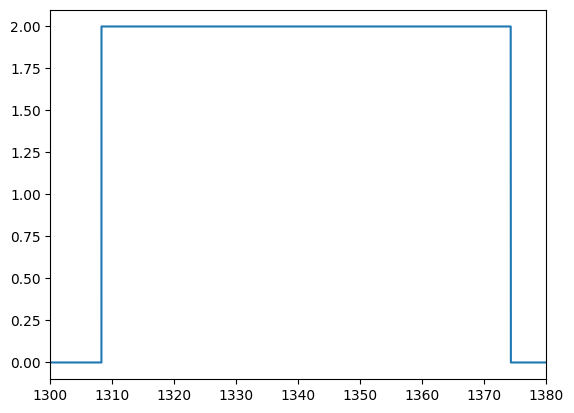

In [150]:
#print(*p_calib[p]['calib_label']['calib_label'].values, sep='\n')
plt.plot((p_calib[p]['calib_label']['Timestamp']-p_calib[p]['calib_label']['Timestamp'].iloc[0]).values, p_calib[p]['calib_label']['calib_label'].values)
plt.xlim([1300,1380])
# looks good